step 1 upload the spreadsheet

In [2]:
import pandas as pd

# If running in Google Colab, you need to upload the file first
from google.colab import files

# Upload the file (uncomment the line below if you are running this in Colab)
# uploaded = files.upload()

# Load the dataset
file_path = 'SAF Dataset.xlsx'  # Make sure this matches the uploaded file name

# Load the first sheet of the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the dataset
df.head()

,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),Location,Plant capacity (kg/hr),MSP
0,53.041259,6.390897,0.871969,39.366227,0.329647,82.070081,4.884097,13.045822,37.260000,14.620000,31.680000,US,25000,0.64
1,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,12.000000,17.216438,31.300000,24.300000,14.100000,US,25000,0.63
2,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,10.020831,17.684464,35.000000,27.500000,10.000000,US,25000,0.69
3,45.739910,10.762332,7.036909,34.908589,1.552259,49.357766,42.020000,8.626970,35.000000,25.000000,26.500000,US,25000,0.85
4,44.480000,6.280000,8.210000,40.490000,0.540000,77.497780,6.472025,16.030195,22.775726,55.419525,2.955145,US,25000,1.20


step 2 check for missing data

In [3]:
# Check for missing values in the dataset and print the total number of missing values for each column
missing_data = df.isnull().sum()

# Print the result
print("Total number of missing values for each column:")
print(missing_data)

# no values are missing so nothing more needs to be done

Total number of missing values for each column:
C (%)                     0
H (%)                     0
N (%)                     0
O (%)                     0
S (%)                     0
VM (%)                    0
Ash (%)                   0
FC (%)                    0
Cel (%)                   0
Hem (%)                   0
Lig (%)                   0
Location                  0
Plant capacity (kg/hr)    0
MSP                       0
dtype: int64


step 3 handling outliers with boxplot

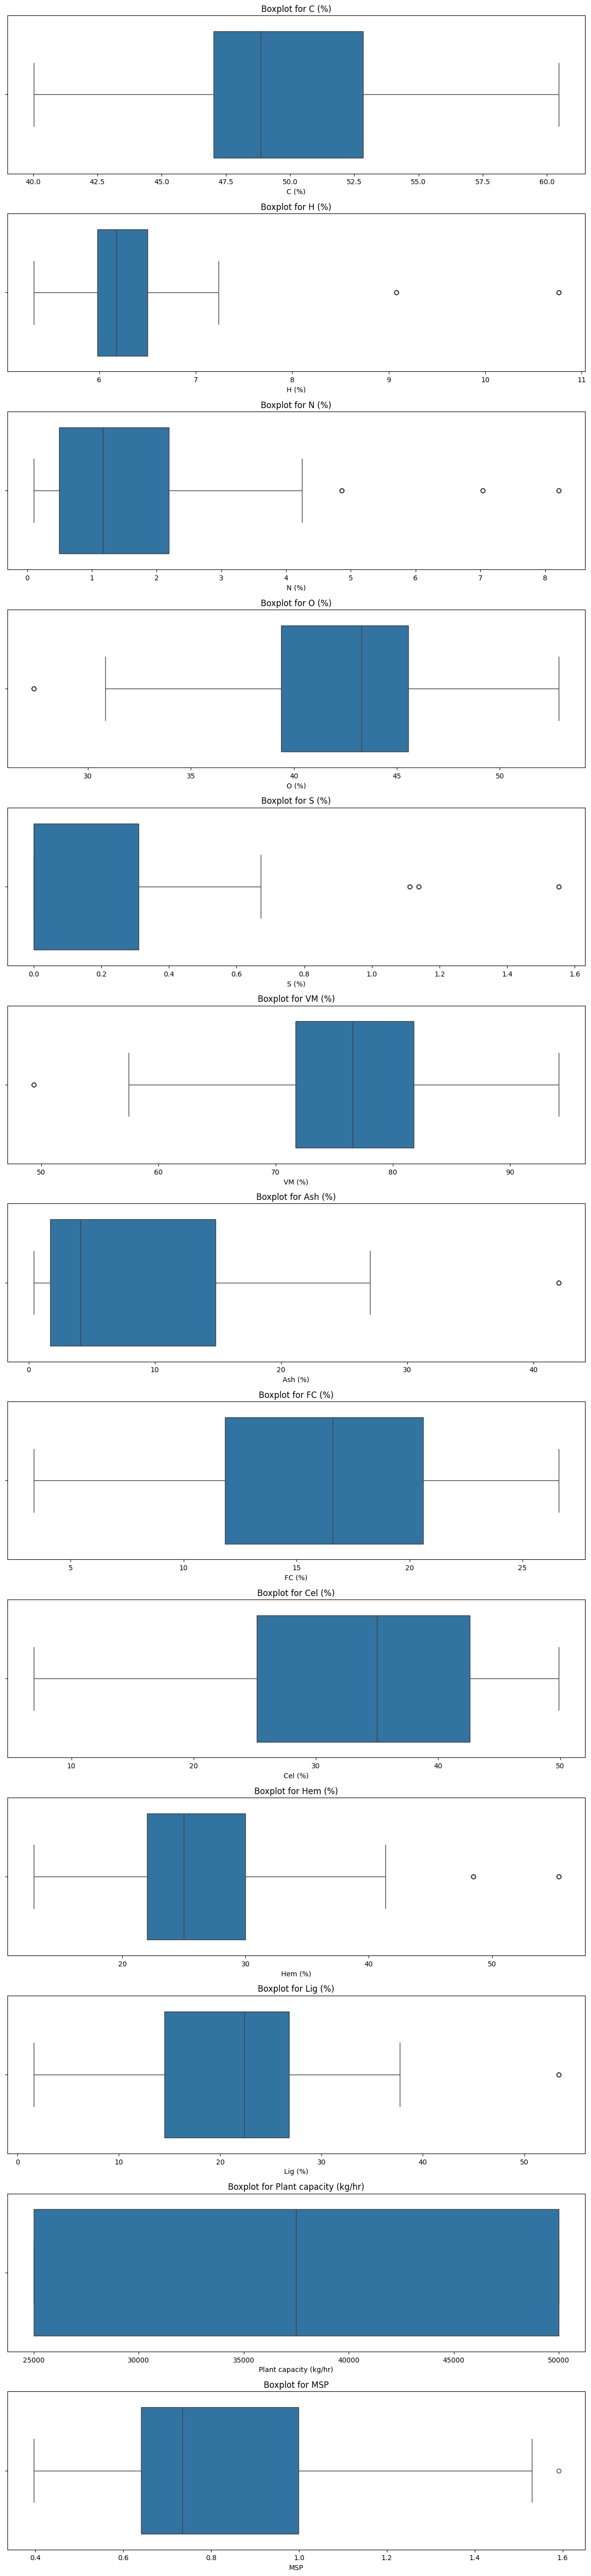

Shape of dataset before removing outliers: (186, 14)
Shape of dataset after removing outliers: (180, 14)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the dataset
numeric_columns = df.select_dtypes(include='number').columns

# Plot a boxplot for each numeric column
plt.figure(figsize=(12, len(numeric_columns) * 4))  # Adjust figure size to accommodate all plots

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)  # Create a subplot for each column
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot for {column}")
    plt.tight_layout()  # Adjust layout to avoid overlap

plt.show()

# because there are very few outliers, I will remove them from the dataset

# Iterate over each numeric column and remove outliers based on the boxplot
def remove_outliers(df):
    for column in df.select_dtypes(include='number').columns:
        R1 = df[column].quantile(0.1)  # First 10% of data
        R9 = df[column].quantile(0.9)  # last 10% of data
        Range = R9 - R1

        # Define bounds for outliers
        lower_bound = R1 - 1.5 * Range
        upper_bound = R9 + 1.5 * Range

        # Remove rows that have outliers in this column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Apply the function to remove outliers
df_cleaned = remove_outliers(df)

# Print the shape of the cleaned dataset to verify removal
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", df_cleaned.shape)

step 4: summary statistics

In [5]:
# Calculate statistics for numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number')

# Mean
mean_values = numeric_cols.mean()

# Median
median_values = numeric_cols.median()

# Standard Deviation
std_values = numeric_cols.std()

# Min and Max
min_values = numeric_cols.min()
max_values = numeric_cols.max()

# Interquartile Range (IQR)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
iqr_values = Q3 - Q1

# Display the results
stats_summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_values,
    'Min': min_values,
    'Max': max_values,
    'Interquartile Range (IQR)': iqr_values
})

print(stats_summary)

                                Mean        Median  Standard Deviation  \
C (%)                      49.631745     48.889915            4.008335   
H (%)                       6.274063      6.174469            0.676840   
N (%)                       1.618429      1.025635            1.724692   
O (%)                      42.298673     43.280000            4.968730   
S (%)                       0.177090      0.000000            0.312400   
VM (%)                     76.335698     76.937237            7.958522   
Ash (%)                     7.583625      3.624019            7.898727   
FC (%)                     16.080677     16.611365            6.347950   
Cel (%)                    33.641483     35.945000           10.118367   
Hem (%)                    27.058695     24.650000            9.891953   
Lig (%)                    21.684810     22.400000           11.133659   
Plant capacity (kg/hr)  37500.000000  37500.000000        12534.867571   
MSP                         0.788553  

the median and means were all very close to one another so the data is relatively evenly distributed

step 5: One-Hot Encoding for Categorical Variables

In [6]:
# Identify categorical variables
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Print the shape of the dataset before and after one-hot encoding
print("Shape of dataset before encoding:", df_cleaned.shape)
print("Shape of dataset after encoding:", df_encoded.shape)

# Show the first few rows of the transformed dataset
df_encoded.head()

Shape of dataset before encoding: (180, 14)
Shape of dataset after encoding: (180, 15)


,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),Plant capacity (kg/hr),MSP,Location _UK,Location _US
0,53.041259,6.390897,0.871969,39.366227,0.329647,82.070081,4.884097,13.045822,37.260000,14.620000,31.680000,25000,0.64,False,True
1,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,12.000000,17.216438,31.300000,24.300000,14.100000,25000,0.63,False,True
2,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,10.020831,17.684464,35.000000,27.500000,10.000000,25000,0.69,False,True
4,44.480000,6.280000,8.210000,40.490000,0.540000,77.497780,6.472025,16.030195,22.775726,55.419525,2.955145,25000,1.20,False,True
5,44.695108,7.236989,1.194997,46.872906,0.000000,94.161220,2.472767,3.366013,45.000000,27.000000,10.000000,25000,0.78,False,True


step 6: check for redundant columns

In [7]:
# Identify columns with constant values (no variability)
constant_columns = [col for col in df_encoded.columns if df_encoded[col].nunique() == 1]

# Drop the column "Plant capacity (kg/hr)" since it seemingly has no impact on MSP
if 'Plant capacity (kg/hr)' in df_encoded.columns:
    df_encoded = df_encoded.drop(columns=['Plant capacity (kg/hr)'])

# Drop any constant value columns
df_encoded = df_encoded.drop(columns=constant_columns)

# Print the columns that were dropped and the shape of the dataset after removal
print("Constant columns removed:", constant_columns)
print("Shape of dataset after removing unnecessary columns:", df_encoded.shape)

# Display the first few rows of the cleaned dataset
df_encoded.head()

Constant columns removed: []
Shape of dataset after removing unnecessary columns: (180, 14)


,C (%),H (%),N (%),O (%),S (%),VM (%),Ash (%),FC (%),Cel (%),Hem (%),Lig (%),MSP,Location _UK,Location _US
0,53.041259,6.390897,0.871969,39.366227,0.329647,82.070081,4.884097,13.045822,37.260000,14.620000,31.680000,0.64,False,True
1,52.846674,6.186584,0.436866,40.219842,0.310034,70.783562,12.000000,17.216438,31.300000,24.300000,14.100000,0.63,False,True
2,40.020000,6.010000,0.880000,52.860000,0.230000,72.294705,10.020831,17.684464,35.000000,27.500000,10.000000,0.69,False,True
4,44.480000,6.280000,8.210000,40.490000,0.540000,77.497780,6.472025,16.030195,22.775726,55.419525,2.955145,1.20,False,True
5,44.695108,7.236989,1.194997,46.872906,0.000000,94.161220,2.472767,3.366013,45.000000,27.000000,10.000000,0.78,False,True


step 7: Correlation and Heatmaps

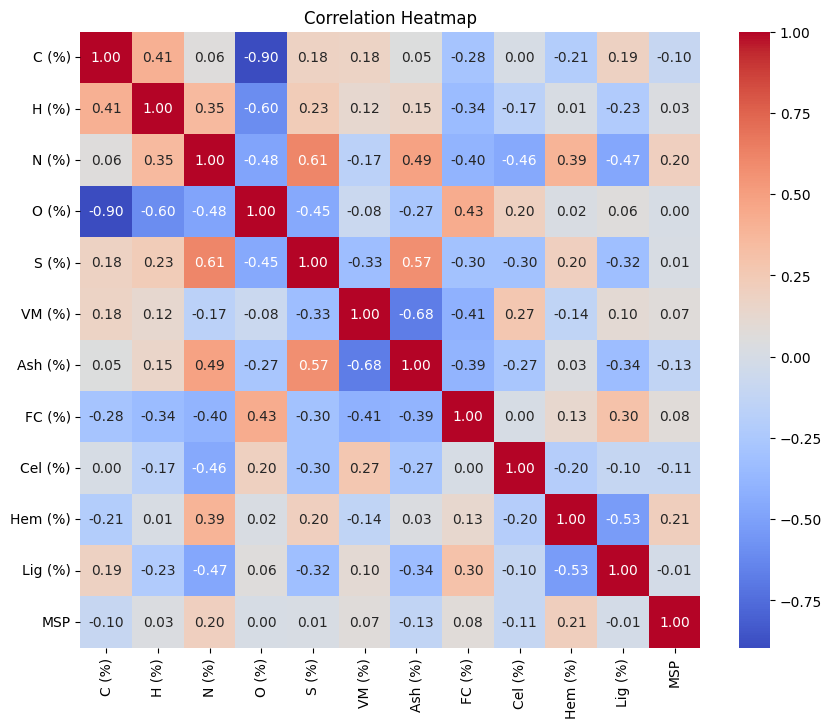

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.iloc[:, :12].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()

The MSP is not heavily related to any of the input variables. MSP is most closely related to N (%) and Hem (%). Some of the feature variables (ones with a correlation of over 0.5 or under -0.5) do show some correlating between themselves.

step 8: Visualizing Data Relationships

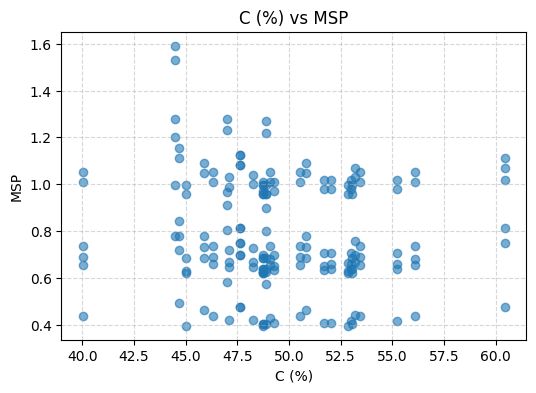

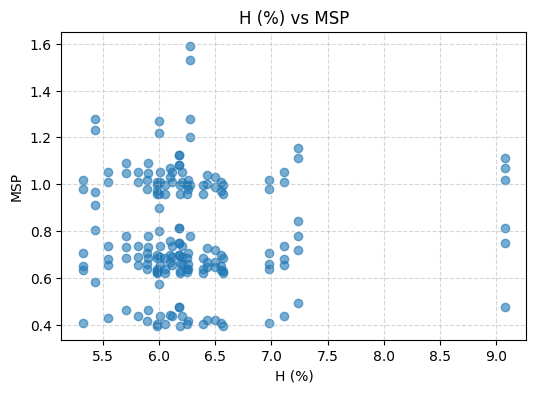

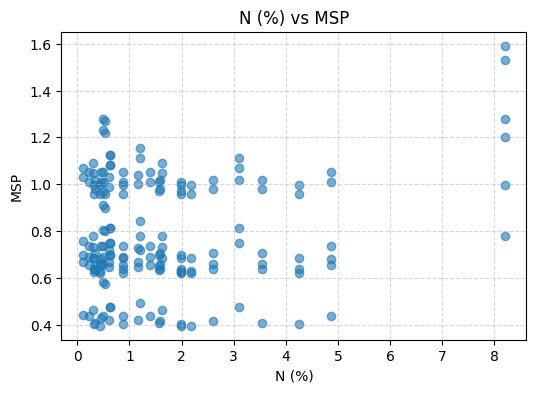

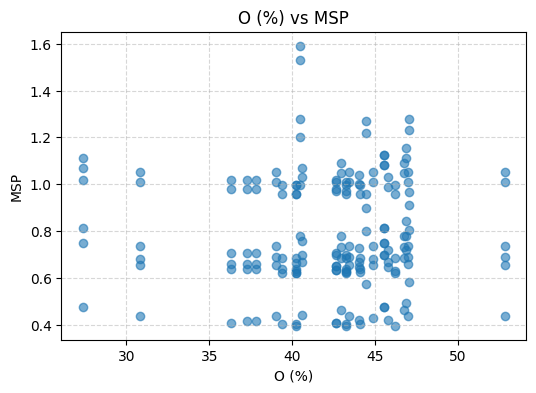

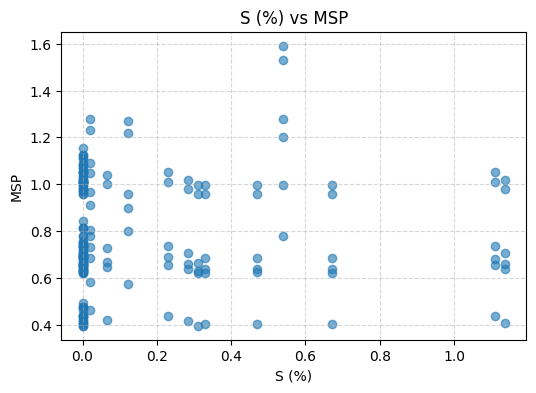

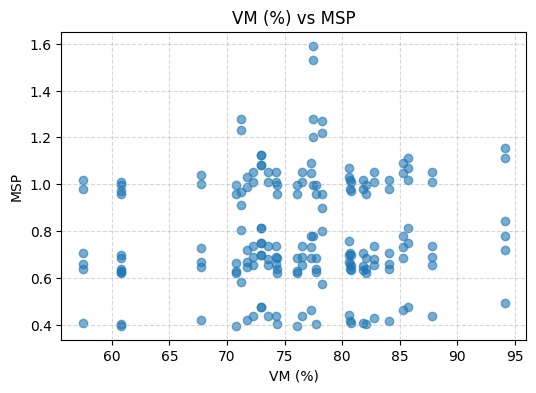

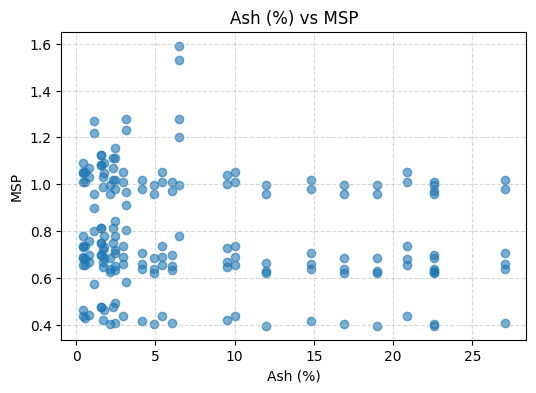

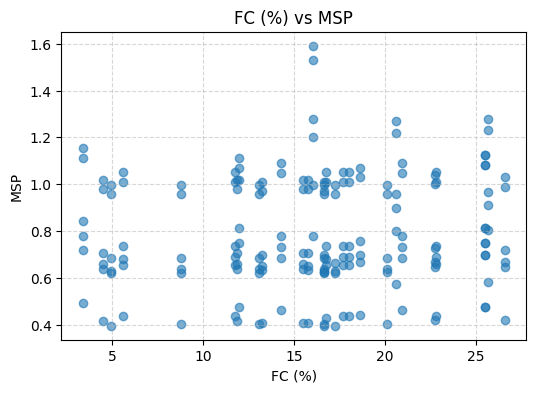

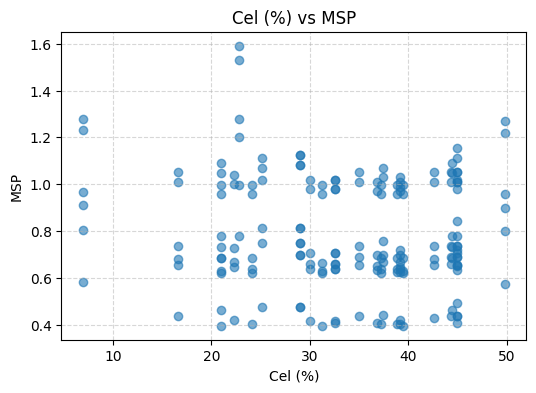

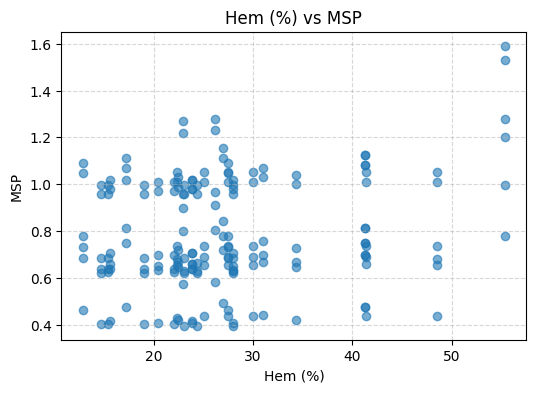

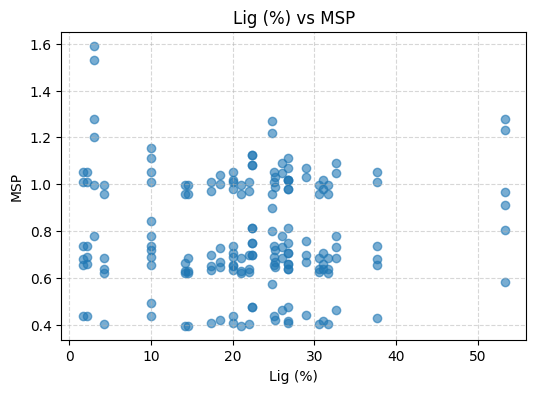

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assign the 12th column as the target variable (MSP)
output_variable = df_encoded.columns[11]

# Create scatter plots for each input variable against the output variable
for i in range(11):
    input_variable = df_encoded.columns[i]
    plt.figure(figsize=(6, 4))
    plt.scatter(df_encoded[input_variable], df_encoded[output_variable], alpha=0.6)
    plt.xlabel(input_variable)
    plt.ylabel(output_variable)
    plt.title(f'{input_variable} vs {output_variable}')
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.show()

The scatter plots do no show and specific trends between the features and target variable.

Step 10: Final thoughts
Nitrogen Percent and Hem % are the two varibles that show even a little correlation to MSP (found from the heatmap). The rest of the feature variables show very little or no correlation to MSP.